In [3]:
!pip install pandas numpy matplotlib seaborn 



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
!pip install joblib scikit-learn



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import joblib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [6]:
!pip install openpyxl



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
import pandas as pd

df = pd.read_excel("ev data set.xlsx")



In [8]:
df.head()

,Date,County,State,Vehicle Primary Use,Battery Electric Vehicles (BEVs),Plug-In Hybrid Electric Vehicles (PHEVs),Electric Vehicle (EV) Total,Non-Electric Vehicle Total,Total Vehicles,Percent Electric Vehicles
0,September 30 2022,Riverside,CA,Passenger,7,0,7,460,467,1.50
1,December 31 2022,Prince William,VA,Passenger,1,2,3,188,191,1.57
2,January 31 2020,Dakota,MN,Passenger,0,1,1,32,33,3.03
3,June 30 2022,Ferry,WA,Truck,0,0,0,3575,3575,0.00
4,July 31 2021,Douglas,CO,Passenger,0,1,1,83,84,1.19


In [9]:
df.shape

(20819, 10)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20819 entries, 0 to 20818
Data columns (total 10 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Date                                      20819 non-null  object 
 1   County                                    20733 non-null  object 
 2   State                                     20733 non-null  object 
 3   Vehicle Primary Use                       20819 non-null  object 
 4   Battery Electric Vehicles (BEVs)          20819 non-null  int64  
 5   Plug-In Hybrid Electric Vehicles (PHEVs)  20819 non-null  int64  
 6   Electric Vehicle (EV) Total               20819 non-null  int64  
 7   Non-Electric Vehicle Total                20819 non-null  int64  
 8   Total Vehicles                            20819 non-null  int64  
 9   Percent Electric Vehicles                 20819 non-null  float64
dtypes: float64(1), int64(5), object(4)

In [11]:
df.isnull()

,Date,County,State,Vehicle Primary Use,Battery Electric Vehicles (BEVs),Plug-In Hybrid Electric Vehicles (PHEVs),Electric Vehicle (EV) Total,Non-Electric Vehicle Total,Total Vehicles,Percent Electric Vehicles
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
20814,False,False,False,False,False,False,False,False,False,False
20815,False,False,False,False,False,False,False,False,False,False
20816,False,False,False,False,False,False,False,False,False,False
20817,False,False,False,False,False,False,False,False,False,False


In [12]:
df.isnull().sum()

Date                                         0
County                                      86
State                                       86
Vehicle Primary Use                          0
Battery Electric Vehicles (BEVs)             0
Plug-In Hybrid Electric Vehicles (PHEVs)     0
Electric Vehicle (EV) Total                  0
Non-Electric Vehicle Total                   0
Total Vehicles                               0
Percent Electric Vehicles                    0
dtype: int64

In [13]:
# Step 1: Convert column to numeric (safely)
df['Percent Electric Vehicles'] = pd.to_numeric(df['Percent Electric Vehicles'], errors='coerce')

# Step 2: Drop rows where conversion failed (optional, if any)
df = df.dropna(subset=['Percent Electric Vehicles'])

# Step 3: Calculate IQR bounds
Q1 = df['Percent Electric Vehicles'].quantile(0.25)
Q3 = df['Percent Electric Vehicles'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print('Lower Bound:', lower_bound)
print('Upper Bound:', upper_bound)

# Step 4: Detect outliers
outliers = df[(df['Percent Electric Vehicles'] < lower_bound) | 
              (df['Percent Electric Vehicles'] > upper_bound)]

print("Number of outliers in 'Percent Electric Vehicles':", outliers.shape[0])


Lower Bound: -3.5174999999999996
Upper Bound: 6.9025
Number of outliers in 'Percent Electric Vehicles': 2476


In [14]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Remove rows where 'Date' or 'Electric Vehicle (EV) Total' is missing
df = df[df['Date'].notnull()]
df = df[df['Electric Vehicle (EV) Total'].notnull()]

# Fill missing values in 'County' and 'State' columns
df['County'] = df['County'].fillna('Unknown')
df['State'] = df['State'].fillna('Unknown')

print("Missing after fill:")
print(df[['County','State']].isnull().sum())

df.head()


Missing after fill:
County    0
State     0
dtype: int64


,Date,County,State,Vehicle Primary Use,Battery Electric Vehicles (BEVs),Plug-In Hybrid Electric Vehicles (PHEVs),Electric Vehicle (EV) Total,Non-Electric Vehicle Total,Total Vehicles,Percent Electric Vehicles
0,2022-09-30,Riverside,CA,Passenger,7,0,7,460,467,1.50
1,2022-12-31,Prince William,VA,Passenger,1,2,3,188,191,1.57
2,2020-01-31,Dakota,MN,Passenger,0,1,1,32,33,3.03
3,2022-06-30,Ferry,WA,Truck,0,0,0,3575,3575,0.00
4,2021-07-31,Douglas,CO,Passenger,0,1,1,83,84,1.19


In [15]:
import numpy as np


In [16]:
df['Percent Electric Vehicles'] = np.where(
    df['Percent Electric Vehicles'] > upper_bound,
    upper_bound,
    np.where(
        df['Percent Electric Vehicles'] < lower_bound,
        lower_bound,
        df['Percent Electric Vehicles']
    )
)

outliers = df[(df['Percent Electric Vehicles'] < lower_bound) | (df['Percent Electric Vehicles'] > upper_bound)] 
print("Number of outliers in 'Percent Electric Vehicles':", outliers.shape[0])


Number of outliers in 'Percent Electric Vehicles': 0


In [17]:
pip install numpy pandas openpyxl matplotlib seaborn scikit-learn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [18]:
import pandas as pd  # ✅ Import added

cols_to_convert = [
    'Battery Electric Vehicles (BEVs)',
    'Plug-In Hybrid Electric Vehicles (PHEVs)',
    'Electric Vehicle (EV) Total',
    'Non-Electric Vehicle Total',
    'Total Vehicles',
    'Percent Electric Vehicles'
]

for col in cols_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df[cols_to_convert].describe()


,Battery Electric Vehicles (BEVs),Plug-In Hybrid Electric Vehicles (PHEVs),Electric Vehicle (EV) Total,Non-Electric Vehicle Total,Total Vehicles,Percent Electric Vehicles
count,20819.000000,20819.000000,20819.000000,2.081900e+04,2.081900e+04,20819.000000
mean,217.516211,80.063644,297.579855,2.509806e+04,2.539564e+04,2.122378
std,2278.533317,646.373208,2915.504792,1.067324e+05,1.090860e+05,2.277542
min,0.000000,0.000000,0.000000,0.000000e+00,1.000000e+00,0.000000
25%,0.000000,0.000000,1.000000,4.300000e+01,4.400000e+01,0.390000
50%,1.000000,1.000000,1.000000,1.630000e+02,1.650000e+02,1.220000
75%,3.000000,2.000000,4.000000,8.380000e+03,8.421500e+03,2.995000
max,72333.000000,17501.000000,89834.000000,1.399823e+06,1.430937e+06,6.902500


In [ ]:
# Group by County and sum up the EV totals
top_counties = df.groupby('County')['Electric Vehicle (EV) Total'].sum().sort_values(ascending=False).head(3)
bottom_counties = df.groupby('County')['Electric Vehicle (EV) Total'].sum().sort_values(ascending=True).head(3)

# Display the results
print("🔝 Top 3 Counties with Highest EV Total:\n")
print(top_counties)

print("\n🔻 Bottom 3 Counties with Lowest EV Total:\n")
print(bottom_counties)


Top 3 Counties:
 County
King         3309850
Snohomish     683598
Pierce        456003
Name: Electric Vehicle (EV) Total, dtype: int64

Bottom 3 Counties:
 County
Brown         1
Union         1
Hood River    1
Name: Electric Vehicle (EV) Total, dtype: int64


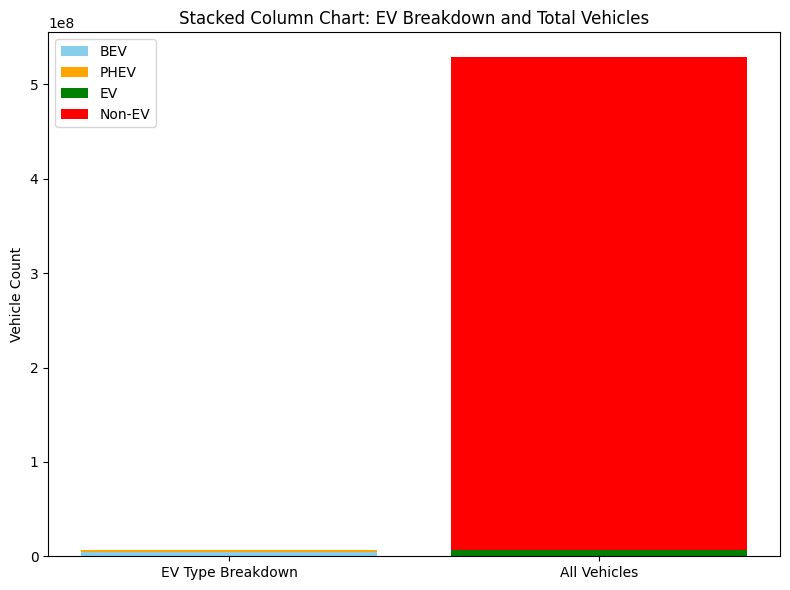

In [21]:
import matplotlib.pyplot as plt

# Total sums for stacked column chart
bev_total = df['Battery Electric Vehicles (BEVs)'].sum()
phev_total = df['Plug-In Hybrid Electric Vehicles (PHEVs)'].sum()
ev_total = df['Electric Vehicle (EV) Total'].sum()
non_ev_total = df['Non-Electric Vehicle Total'].sum()
all_total = df['Total Vehicles'].sum()

# Stacked column chart
fig, ax = plt.subplots(figsize=(8, 6))

# Stack EV types
ax.bar('EV Type Breakdown', bev_total, label='BEV', color='skyblue')
ax.bar('EV Type Breakdown', phev_total, bottom=bev_total, label='PHEV', color='orange')

# Stack Total Vehicle categories
ax.bar('All Vehicles', ev_total, label='EV', color='green')
ax.bar('All Vehicles', non_ev_total, bottom=ev_total, label='Non-EV', color='red')

# Final touches
ax.set_ylabel('Vehicle Count')
ax.set_title('Stacked Column Chart: EV Breakdown and Total Vehicles')
ax.legend()
plt.tight_layout()
plt.show()


In [22]:
# Extract year, month, and numeric_date from 'Date' column
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month


df['numeric_date'] = df['Date'].dt.year * 12 +df['Date'].dt.month


In [23]:
from sklearn.preprocessing import LabelEncoder

# Encode 'County'
le = LabelEncoder()
df['county_encoded'] = le.fit_transform(df['County'])


In [24]:
# Sort for lag creation
df = df.sort_values(['County', 'Date'])


In [25]:
import numpy as np

# Assign time index per county
df['months_since_start'] = df.groupby('County').cumcount()

# Create lag features (1-3 months)
for lag in [1, 2, 3]:
    df[f'ev_total_lag_{lag}'] = df.groupby('County')['Electric Vehicle (EV) Total'].shift(lag)

# Rolling average (3-month, prior to current)
df['ev_total_roll_mean_3'] = df.groupby('County')['Electric Vehicle (EV) Total'] \
                               .transform(lambda x: x.shift(1).rolling(3).mean())

# Percent change: 1-month and 3-month (no fill method)
df['ev_total_pct_change_1'] = df.groupby('County')['Electric Vehicle (EV) Total'] \
                                .pct_change(periods=1, fill_method=None)

df['ev_total_pct_change_3'] = df.groupby('County')['Electric Vehicle (EV) Total'] \
                                .pct_change(periods=3, fill_method=None)

# Clean up any infs/NaNs in percent change columns
df['ev_total_pct_change_1'] = df['ev_total_pct_change_1'].replace([np.inf, -np.inf], np.nan).fillna(0)
df['ev_total_pct_change_3'] = df['ev_total_pct_change_3'].replace([np.inf, -np.inf], np.nan).fillna(0)


In [26]:
import numpy as np

# Cumulative EV count per county
df['cumulative_ev'] = df.groupby('County')['Electric Vehicle (EV) Total'].cumsum()

# 6-month rolling linear slope of cumulative growth
df['ev_growth_slope'] = df.groupby('County')['cumulative_ev'].transform(
    lambda x: x.rolling(6).apply(
        lambda y: np.polyfit(range(len(y)), y, 1)[0] if len(y) == 6 else np.nan,
        raw=False
    )
)


In [27]:
# Drop early rows with NaN lag features and reset index
df = df.dropna().reset_index(drop=True)


In [28]:
df.to_csv('preprocessed_ev_data.csv',index=False)

df.head()

,Date,County,State,Vehicle Primary Use,Battery Electric Vehicles (BEVs),Plug-In Hybrid Electric Vehicles (PHEVs),Electric Vehicle (EV) Total,Non-Electric Vehicle Total,Total Vehicles,Percent Electric Vehicles,...,county_encoded,months_since_start,ev_total_lag_1,ev_total_lag_2,ev_total_lag_3,ev_total_roll_mean_3,ev_total_pct_change_1,ev_total_pct_change_3,cumulative_ev,ev_growth_slope
0,2018-05-31,Ada,ID,Passenger,0,2,2,341,343,0.58,...,0,5,2.0,2.0,2.0,2.0,0.0,0.0,10,1.857143
1,2018-06-30,Ada,ID,Passenger,0,2,2,332,334,0.60,...,0,6,2.0,2.0,2.0,2.0,0.0,0.0,12,2.000000
2,2018-07-31,Ada,ID,Passenger,0,2,2,329,331,0.60,...,0,7,2.0,2.0,2.0,2.0,0.0,0.0,14,2.000000
3,2018-08-31,Ada,ID,Passenger,0,2,2,325,327,0.61,...,0,8,2.0,2.0,2.0,2.0,0.0,0.0,16,2.000000
4,2018-09-30,Ada,ID,Passenger,0,2,2,327,329,0.61,...,0,9,2.0,2.0,2.0,2.0,0.0,0.0,18,2.000000


In [30]:
# Lag features for EV totals
df['ev_total_lag1'] = df.groupby('County')['Electric Vehicle (EV) Total'].shift(1)
df['ev_total_lag2'] = df.groupby('County')['Electric Vehicle (EV) Total'].shift(2)
df['ev_total_lag3'] = df.groupby('County')['Electric Vehicle (EV) Total'].shift(3)

# Rolling average of last 3 months
df['ev_total_roll_mean_3'] = df.groupby('County')['Electric Vehicle (EV) Total'].transform(lambda x: x.shift(1).rolling(3).mean())

# Percentage changes
df['ev_total_pct_change_1'] = df.groupby('County')['Electric Vehicle (EV) Total'].pct_change(periods=1)
df['ev_total_pct_change_3'] = df.groupby('County')['Electric Vehicle (EV) Total'].pct_change(periods=3)


In [31]:
df = df.dropna().reset_index(drop=True)


In [32]:
X = df[features]
y = df[target]
X.head()


,months_since_start,county_encoded,ev_total_lag1,ev_total_lag2,ev_total_lag3,ev_total_roll_mean_3,ev_total_pct_change_1,ev_total_pct_change_3,ev_growth_slope
0,8,0,2.0,2.0,2.0,2.0,0.0,0.0,2.0
1,9,0,2.0,2.0,2.0,2.0,0.0,0.0,2.0
2,10,0,2.0,2.0,2.0,2.0,0.0,0.0,2.0
3,11,0,2.0,2.0,2.0,2.0,0.0,0.0,2.0
4,12,0,2.0,2.0,2.0,2.0,0.0,0.0,2.0


In [33]:
X.shape

(17108, 9)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X,y ,shuffle=False, test_size=0.1)

In [36]:
y_test.head()

15397    4110
15398      57
15399    4247
15400      60
15401    4349
Name: Electric Vehicle (EV) Total, dtype: int64

In [38]:
import numpy as np

# Check if any value is inf or -inf
print("Has inf:", np.isinf(X_train).values.any())
print("Has NaN:", np.isnan(X_train).values.any())
print("Max value:", X_train.max().max())
print("Min value:", X_train.min().min())


Has inf: True
Has NaN: False
Max value: inf
Min value: -1.0


In [39]:
import numpy as np

# Replace inf and -inf with NaN
X_train.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with NaN (which were previously inf)
X_train.dropna(inplace=True)

# Make sure y_train is aligned with updated X_train
y_train = y_train.loc[X_train.index]


In [40]:
random_search.fit(X_train, y_train)


Fitting 3 folds for each of 30 candidates, totalling 90 fits


,estimator,RandomForestR...ndom_state=42)
,param_distributions,"{'max_depth': [None, 5, ...], 'max_features': ['sqrt', 'log2', ...], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 4, ...], ...}"
,n_iter,30
,scoring,'r2'
,n_jobs,-1
,refit,True
,cv,3
,verbose,1
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [41]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

# Define parameter distribution
param_dist = {
    'n_estimators': [100, 150, 200, 250],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 4, 6, 8],
    'min_samples_leaf': [1, 2, 3],
    'max_features': ['sqrt', 'log2', None]
}

# Base model
rf = RandomForestRegressor(random_state=42)

# Randomized Search
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=30,  # 30 random combinations
    scoring='r2',
    cv=3,
    n_jobs=-1,
    verbose=1,
    random_state=42
)

# Fit model
random_search.fit(X_train, y_train)

# Best model
model = random_search.best_estimator_

# Best hyperparameters
print("Best Parameters:", random_search.best_params_)


Fitting 3 folds for each of 30 candidates, totalling 90 fits
Best Parameters: {'n_estimators': 250, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None}


In [47]:
import numpy as np

# Replace inf and -inf with NaN, then fill with suitable values (e.g., column mean)
X_test = X_test.replace([np.inf, -np.inf], np.nan)
X_test = X_test.fillna(X_test.mean())


In [48]:
y_pred = model.predict(X_test)


In [49]:
X_test.head()

,months_since_start,county_encoded,ev_total_lag1,ev_total_lag2,ev_total_lag3,ev_total_roll_mean_3,ev_total_pct_change_1,ev_total_pct_change_3,ev_growth_slope
15397,151,274,55.0,52.0,4005.0,1370.666667,73.727273,0.026217,2088.514286
15398,152,274,4110.0,55.0,52.0,1405.666667,-0.986131,0.096154,1545.742857
15399,153,274,57.0,4110.0,55.0,1407.333333,73.508772,76.218182,1696.600000
15400,154,274,4247.0,57.0,4110.0,2804.666667,-0.985872,-0.985401,1941.257143
15401,155,274,60.0,4247.0,57.0,1454.666667,71.483333,75.298246,2327.257143


In [50]:
from sklearn.metrics import mean_squared_error, r2_score

# Create a DataFrame with actual and predicted values
comparison_df = pd.DataFrame({
    'Actual EV Count': y_test.values,
    'Predicted EV Count': y_pred
})

# Round predicted values for readability
comparison_df['Predicted EV Count'] = comparison_df['Predicted EV Count'].round(2)

# Optionally reset index
comparison_df.reset_index(drop=True, inplace=True)

# Display first 10 rows
print("Actual vs Predicted EV Count:")
print(comparison_df.head(10))

# Evaluation Metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.4f}")


Actual vs Predicted EV Count:
   Actual EV Count  Predicted EV Count
0             4110             4289.31
1               57               94.38
2             4247             4154.11
3               60               92.96
4             4349             4511.51
5               64              100.04
6             4447             4766.91
7             4646             4492.23
8               70              151.80
9             4767             5557.57

Model Evaluation Metrics:
Mean Squared Error (MSE): 3689.14
R² Score: 0.9896


MAE: 18.11, RMSE: 60.74, R2 Score: 0.99


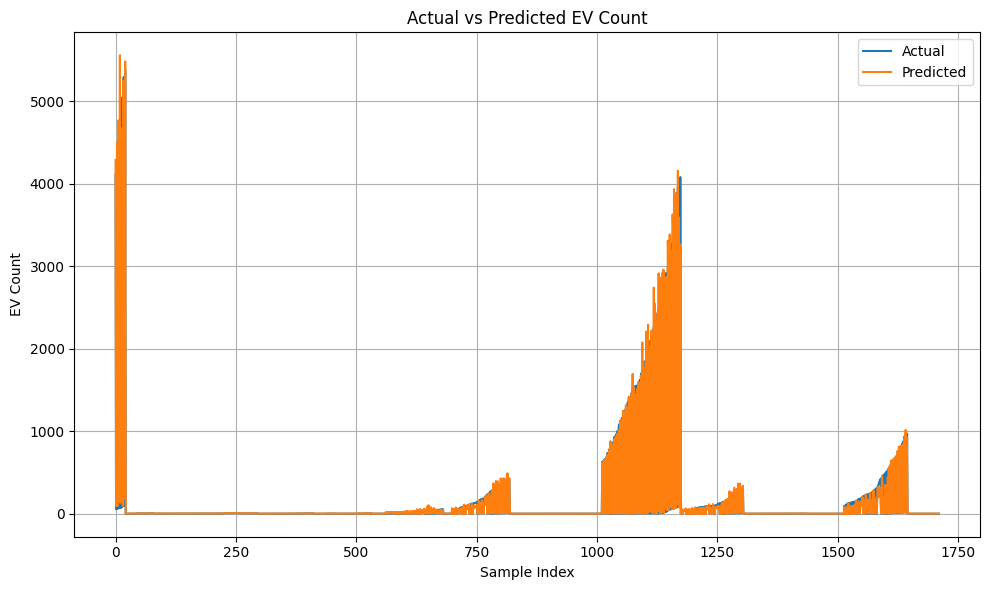

In [52]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Evaluation Function
def evaluate(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2Score = r2_score(y_true, y_pred)

    print(f"MAE: {mae:.2f}, RMSE: {rmse:.2f}, R2 Score: {r2Score:.2f}")

# Call the evaluation
evaluate(y_test, y_pred)

# Plot actual vs predicted values
plt.figure(figsize=(10,6))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title("Actual vs Predicted EV Count")
plt.xlabel("Sample Index")
plt.ylabel("EV Count")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


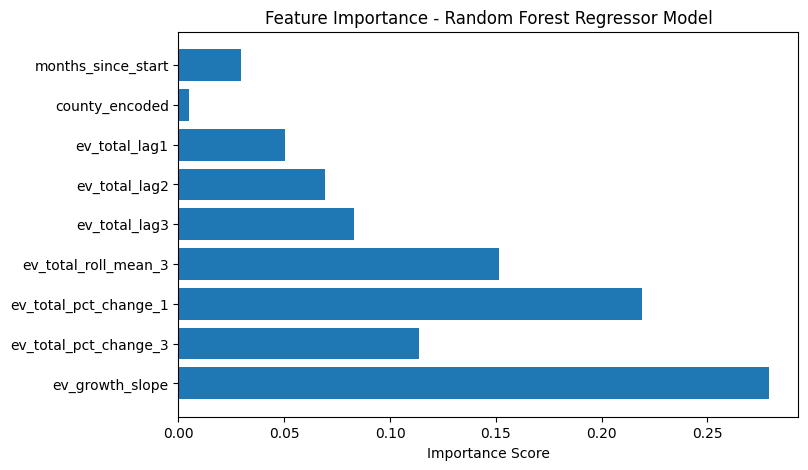

In [53]:


# Get feature importances
importances = model.feature_importances_

# Plot
plt.figure(figsize=(8, 5))
plt.barh(features, importances)
plt.xlabel('Importance Score')
plt.title('Feature Importance - Random Forest Regressor Model')
plt.gca().invert_yaxis()  # Highest importance on top
plt.show()


In [54]:
# Define the features you're using
featuresX = ['County', 'county_encoded']

# Subset the DataFrame for those features
countyX = df[featuresX]

# List all unique counties
print("List of unique counties:")
print(df['County'].dropna().unique())

print("Total unique counties:", df['County'].nunique())


List of unique counties:
['Ada' 'Adams' 'Alameda' 'Albemarle' 'Alexandria' 'Allegheny' 'Allen'
 'Anchorage' 'Anne Arundel' 'Arapahoe' 'Arlington' 'Asotin' 'Atlantic'
 'Autauga' 'Baltimore' 'Bartow' 'Beaufort' 'Bell' 'Benton' 'Bergen'
 'Berkeley' 'Berkshire' 'Bexar' 'Boone' 'Boulder' 'Bradley' 'Brevard'
 'Broward' 'Bucks' 'Burlington' 'Caddo' 'Calvert' 'Camden' 'Canyon'
 'Carroll' 'Carson City' 'Cascade' 'Champaign' 'Charles' 'Charleston'
 'Chelan' 'Chesapeake' 'Clackamas' 'Clallam' 'Clark' 'Clay' 'Clinton'
 'Cobb' 'Cochise' 'Collier' 'Collin' 'Columbia' 'Contra Costa' 'Cook'
 'Coryell' 'Cowlitz' 'Cumberland' 'Currituck' 'Dakota' 'Dale' 'Dallas'
 'Danville' 'DeKalb' 'Denton' 'Denver' 'Deschutes' 'District of Columbia'
 'Dorchester' 'Douglas' 'DuPage' 'Duval' 'Eagle' 'Eau Claire' 'El Dorado'
 'El Paso' 'Escambia' 'Essex' 'Fairbanks North Star' 'Fairfax' 'Ferry'
 'Flathead' 'Fort Bend' 'Franklin' 'Frederick' 'Fresno' 'Fulton'
 'Galveston' 'Garfield' 'Geary' 'Goochland' 'Grant' 'Grays Harb

County 'Kings' encoded as 121.


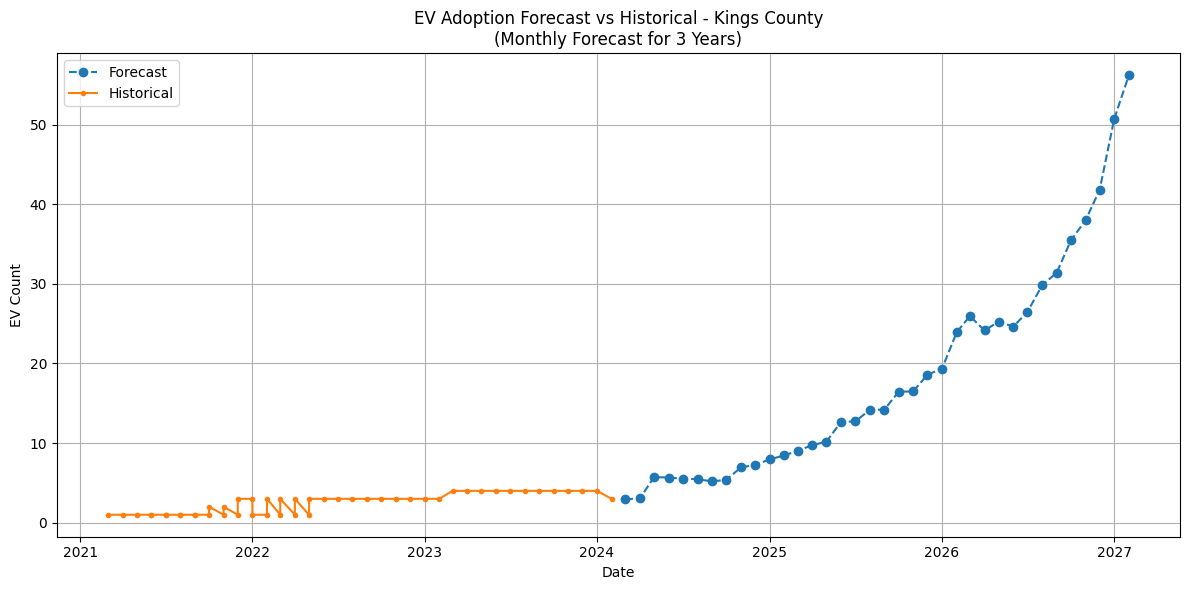

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set your target county
county = "Kings"

# Encode county
try:
    county_code = le.transform([county])[0]
    print(f"County '{county}' encoded as {county_code}.")
except ValueError:
    raise ValueError(f"County '{county}' not found in label encoder.")

# Filter and sort data
county_df = df[df['county_encoded'] == county_code].sort_values("numeric_date")
if county_df.empty:
    raise ValueError(f"No data found for county '{county}'.")

# Prepare initial data
historical_ev = list(county_df['Electric Vehicle (EV) Total'].values[-6:])
cumulative_ev = list(np.cumsum(historical_ev))
months_since_start = county_df['months_since_start'].max()

# Store historical
historical = county_df[['year', 'month', 'numeric_date', 'Electric Vehicle (EV) Total', 'months_since_start']].copy()
historical['Source'] = 'Historical'
historical['Date'] = pd.to_datetime(historical[['year', 'month']].assign(day=1))

# Forecast for next 36 months
future_rows = []
latest_row = county_df.iloc[-1].copy()

for i in range(1, 37):
    next_date = pd.to_datetime(f"{latest_row['year']}-{latest_row['month']}-01") + pd.DateOffset(months=i)
    y, m = next_date.year, next_date.month
    numeric_date = y * 12 + m
    months_since_start += 1

    # Lags and rolling metrics
    lag1, lag2, lag3 = historical_ev[-1], historical_ev[-2], historical_ev[-3]
    roll_mean = np.mean([lag1, lag2, lag3])
    pct_change_1 = (lag1 - lag2) / lag2 if lag2 != 0 else 0
    pct_change_3 = (lag1 - lag3) / lag3 if lag3 != 0 else 0
    recent_cumulative = cumulative_ev[-6:]
    ev_growth_slope = np.polyfit(range(len(recent_cumulative)), recent_cumulative, 1)[0] if len(recent_cumulative) == 6 else 0

    # Create new input row for prediction
    new_row = {
        'months_since_start': months_since_start,
        'county_encoded': county_code,
        'ev_total_lag1': lag1,
        'ev_total_lag2': lag2,
        'ev_total_lag3': lag3,
        'ev_total_roll_mean_3': roll_mean,
        'ev_total_pct_change_1': pct_change_1,
        'ev_total_pct_change_3': pct_change_3,
        'ev_growth_slope': ev_growth_slope
    }

    # Make prediction
    X_new = pd.DataFrame([new_row])[features]
    pred = model.predict(X_new)[0]
    pred = max(pred, 0)  # Avoid negative predictions
    new_row['Electric Vehicle (EV) Total'] = pred

    # Update history
    historical_ev.append(pred)
    if len(historical_ev) > 6: historical_ev.pop(0)
    cumulative_ev.append(cumulative_ev[-1] + pred)
    if len(cumulative_ev) > 6: cumulative_ev.pop(0)

    future_rows.append({
        'Date': next_date,
        'Electric Vehicle (EV) Total': pred,
        'months_since_start': months_since_start,
        'Source': 'Forecast'
    })

# Forecast DataFrame
forecast_df = pd.DataFrame(future_rows)

# Combine
combined = pd.concat([
    historical[['Date', 'Electric Vehicle (EV) Total', 'months_since_start', 'Source']],
    forecast_df
], ignore_index=True)

# Plot
plt.figure(figsize=(12, 6))
for source, group in combined.groupby('Source'):
    plt.plot(group['Date'], group['Electric Vehicle (EV) Total'],
             label=source,
             marker='o' if source == 'Forecast' else '.',
             linestyle='--' if source == 'Forecast' else '-')

plt.title(f"EV Adoption Forecast vs Historical - {county} County\n(Monthly Forecast for 3 Years)")
plt.xlabel("Date")
plt.ylabel("EV Count")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


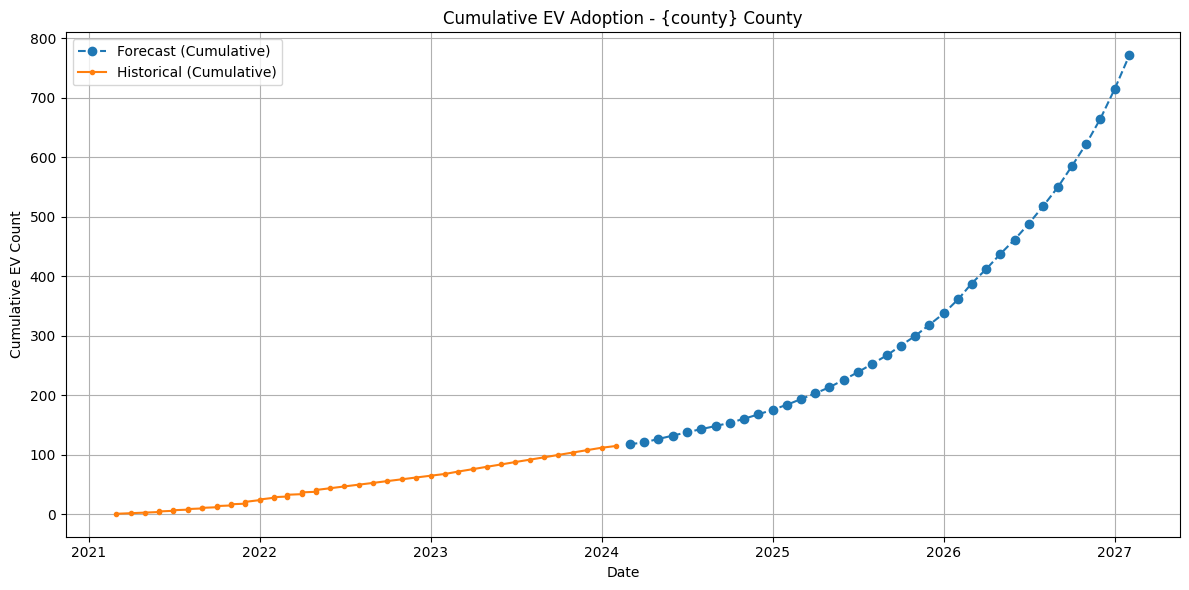

In [63]:

combined = combined.sort_values("Date")
combined['Cumulative EVs'] = combined['Electric Vehicle (EV) Total'].cumsum()

# Plot cumulative EVs
plt.figure(figsize=(12,6))
for source, group in combined.groupby('Source'):
    plt.plot(group['Date'], group['Cumulative EVs'], 
             label=f"{source} (Cumulative)", 
             marker='o' if source == 'Forecast' else '.', 
             linestyle='--' if source == 'Forecast' else '-')

plt.title("Cumulative EV Adoption - {county} County")
plt.xlabel("Date")
plt.ylabel("Cumulative EV Count")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


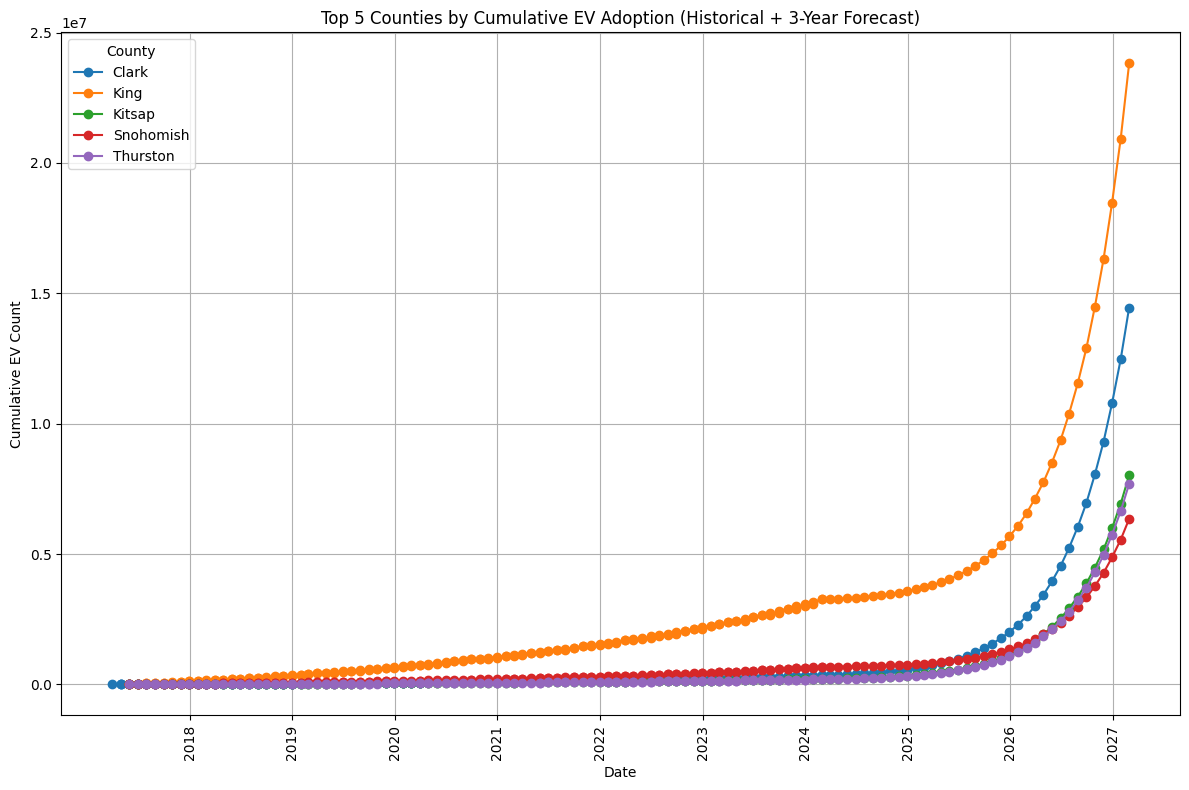

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Constants
forecast_horizon = 36  # 36 months

# Ensure datetime and preprocessing
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')
df['numeric_date'] = (df['Date'] - df['Date'].min()).dt.days
df['months_since_start'] = df['numeric_date'] // 30

# Encode counties
le = LabelEncoder()
df['county_encoded'] = le.fit_transform(df['County'])

# Forecast
all_combined = []
unique_counties = df['County'].dropna().unique()

for county in unique_counties:
    try:
        county_code = le.transform([county])[0]
    except ValueError:
        continue

    county_df = df[df['county_encoded'] == county_code].sort_values("numeric_date")
    if county_df.empty or county_df.shape[0] < 6:
        continue

    months_since_start = county_df['months_since_start'].max()

    historical = county_df[['Date', 'Electric Vehicle (EV) Total', 'months_since_start']].copy()
    historical['Source'] = 'Historical'
    historical['County'] = county

    historical_ev = list(county_df['Electric Vehicle (EV) Total'].values[-6:])
    cumulative_ev = list(np.cumsum(historical_ev))

    slope_history = []
    future_rows = []

    for i in range(forecast_horizon):
        months_since_start += 1

        lag1, lag2, lag3 = historical_ev[-1], historical_ev[-2], historical_ev[-3]
        roll_mean = np.mean([lag1, lag2, lag3])
        pct_change_1 = (lag1 - lag2) / lag2 if lag2 != 0 else 0
        pct_change_3 = (lag1 - lag3) / lag3 if lag3 != 0 else 0
        recent_cumulative = cumulative_ev[-6:]

        ev_growth_slope = (
            np.polyfit(range(len(recent_cumulative)), recent_cumulative, 1)[0]
            if len(recent_cumulative) == 6 else 0
        )

        slope_history.append(ev_growth_slope)
        if len(slope_history) > 2:
            slope_history.pop(0)

        next_ev = lag1 + roll_mean * 0.1 + (ev_growth_slope * 0.1)
        next_ev = max(0, round(next_ev))

        historical_ev.append(next_ev)
        historical_ev = historical_ev[-6:]
        cumulative_ev.append(cumulative_ev[-1] + next_ev)

        future_date = county_df['Date'].max() + pd.DateOffset(months=i+1)
        future_rows.append({
            'Date': future_date,
            'Electric Vehicle (EV) Total': next_ev,
            'months_since_start': months_since_start,
            'Source': 'Forecast',
            'County': county
        })

    forecast_df = pd.DataFrame(future_rows)
    combined = pd.concat([historical, forecast_df])
    combined = combined.sort_values("Date")
    combined['Cumulative EVs'] = combined['Electric Vehicle (EV) Total'].cumsum()
    all_combined.append(combined)

# Combine all counties
full_df = pd.concat(all_combined)

# Final EV totals
final_totals = full_df.groupby('County')['Cumulative EVs'].max().sort_values(ascending=False)
top_5_counties = final_totals.head(5).index.tolist()

# Filter top 5
top_5_df = full_df[full_df['County'].isin(top_5_counties)]

# Plot
plt.figure(figsize=(12, 8))
for county, group in top_5_df.groupby('County'):
    plt.plot(group['Date'], group['Cumulative EVs'], label=county, marker='o', linestyle='-')

plt.title("Top 5 Counties by Cumulative EV Adoption (Historical + 3-Year Forecast)")
plt.xlabel("Date")
plt.ylabel("Cumulative EV Count")
plt.grid(True)
plt.legend(title="County")

# Format x-axis
year_ticks = pd.date_range(start=top_5_df['Date'].min(), end=top_5_df['Date'].max(), freq='YS')
plt.xticks(
    ticks=year_ticks,
    labels=[str(d.year) for d in year_ticks],
    rotation=90
)

plt.tight_layout()
plt.show()


In [68]:
import joblib

# Save the trained model to a file
joblib.dump(model, 'forecasting_ev_model.pkl')

print("Model saved to 'forecasting_ev_model.pkl'")


Model saved to 'forecasting_ev_model.pkl'


In [69]:
import joblib

# Load model from file
loaded_model = joblib.load('forecasting_ev_model.pkl')

print("Model loaded successfully.")


Model loaded successfully.


In [70]:
# Make predictions

# Test prediction on a sample (e.g., first row of X_test)
sample = X_test.iloc[[0]]  # double brackets to keep it as DataFrame
true_value = y_test.iloc[0]

# Predict using the loaded model
predicted_value = loaded_model.predict(sample)[0]

# Display results
print(f"\n Testing saved model on 1 sample:")
print(f"Actual EVs: {true_value:.2f}, Predicted EVs: {predicted_value:.2f}")



 Testing saved model on 1 sample:
Actual EVs: 4110.00, Predicted EVs: 4289.31
